<a href="https://colab.research.google.com/github/r0cd7b/DSAC/blob/master/Lab2_XOR_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], dtype="float32")
y = np.array([[0], [1], [1], [0]], dtype="float32")

[[0.48017547]
 [0.51956606]
 [0.47421843]
 [0.51360315]] [[0.]
 [1.]
 [0.]
 [1.]] 0.5


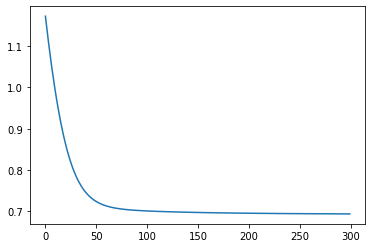

In [2]:
# w = tf.Variable(tf.random.normal([[n1], [n2]]))
w = tf.Variable(tf.random.normal([2, 1]))
# b = tf.Variable([n])
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.1

lossHistory = []
for i in range(300):
  with tf.GradientTape(persistent=True) as tape:
    hypothesis = tf.sigmoid(tf.matmul(x, w) + b)
    cost = -tf.reduce_mean(y * tf.math.log(hypothesis) + (1 - y) * tf.math.log(1 - hypothesis))  # cross entropy
  w_grad, b_grad = tape.gradient(cost, [w, b])
  w.assign_sub(learning_rate * w_grad)
  b.assign_sub(learning_rate * b_grad)
  lossHistory.append(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

print(hypothesis.numpy(), predicted.numpy(), accuracy.numpy())
plt.plot(lossHistory)

# using kerad function

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Please use `model.predict()` instead.
[[0.50329465]
 [0.4844361 ]
 [0.5165976 ]
 [0.49774015]]


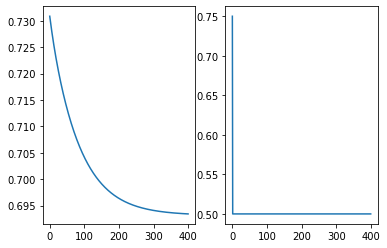

In [4]:
model = Sequential()

model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

model.summary()
model.compile(optimizer=SGD(learning_rate=0.1), loss="binary_crossentropy", metrics="accuracy")
history = model.fit(x, y, epochs=400, verbose=0)

print(model.predict_proba(x))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])

# Multi-layer Perceptron (MLP)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
[[0.074259  ]
 [0.8428382 ]
 [0.85463935]
 [0.18718694]]


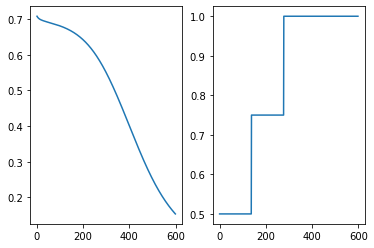

In [5]:
model = Sequential()

model.add(Dense(8, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer=SGD(learning_rate=0.1), loss="binary_crossentropy", metrics="accuracy")
history = model.fit(x, y, epochs=600, verbose=0)

print(model.predict_proba(x))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])

# Many layers (8 layers)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                

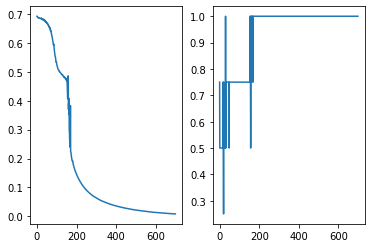

In [8]:
model = Sequential()

layers, activation = 8, "relu"
model.add(Dense(layers, input_shape=(2,), activation=activation))
for i in range(layers - 1):
  model.add(Dense(layers, activation=activation))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer=SGD(learning_rate=0.1), loss="binary_crossentropy", metrics="accuracy")
history = model.fit(x, y, epochs=700, verbose=0)

print(model.predict_proba(x))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])